# Project CCC
Cluster Scaling

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Optimal Batch Size
We try to find out the best possible batch size for the system. 
Therefore we use 1 GPU and increase the batch size until jobs get killed because of memory shortage.
We always train for 2 epochs until we increase the batch size.
### Jobinfo


| Specs  | Vals       |
|------------------|---------|
| Job ID:          |20187895 |
| Cluster:         |rcc|
|User/Group        | nb671233/nb671233|
|State: |COMPLETED (exit code 0)|
|Cores: |1
|CPU Utilized: |01:43:23
|CPU Efficiency:| 91.27% of 01:53:16 core-walltime
|Job Wall-clock time:| 01:53:16
|Memory Utilized:| 5.97 GB
|Memory Efficiency:| 18.64% of 32.00 GB


0 0 0.0 398
1 10 0.3528392860624525 454
2 19 0.605609469016393 518
3 27 0.8513895630836487 591
4 35 1.0975122251775529 674
5 42 1.3326809979809655 769
6 49 1.5674123477273518 877
7 51 1.6711514431238175 1000


Text(0, 0.5, 'epochs | iteration')

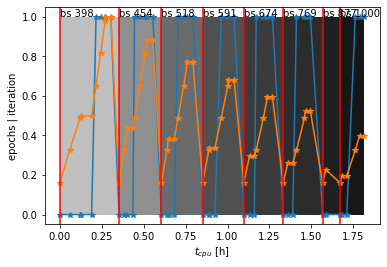

In [232]:
dat_batch_size_scaling = pd.read_csv('data/run-version_20187895-tag-epoch.csv')  
batch_sizes = [398,  454,  518,  591,  674,  769,  877, 1000]
wall_time = dat_batch_size_scaling["Wall time"] - dat_batch_size_scaling["Wall time"][0]
epoch = dat_batch_size_scaling["Value"]
step = dat_batch_size_scaling["Step"]

batch_switch_idx =[0]+ list(np.argwhere(np.diff(step,prepend=0)<0).flatten())+[len(step)-1]
plt.plot(wall_time/3600,epoch,'*-')
plt.plot(wall_time/3600,step/np.max(step),'*-')

# plot vertical lines where the batches are increased
for i in range(len(batch_switch_idx)-1):
    idx = batch_switch_idx[i-1]
    idxp = idx = batch_switch_idx[i]
    t = wall_time[idx].item()/3600
    print(i,idx,t, batch_sizes[i])
    tp = wall_time[idxp].item()/3600
    plt.text(t,1,"bs %d"%batch_sizes[i])
    plt.axvline(x=t, color="red")
    plt.fill_between(wall_time/3600, 0, 1, where= wall_time/3600>=t,facecolor='black', alpha=0.25)
plt.xlabel(r"$t_{cpu}$ [h]")
plt.ylabel(r"epochs | iteration")

Text(0, 0.5, 'time/epoch [s]')

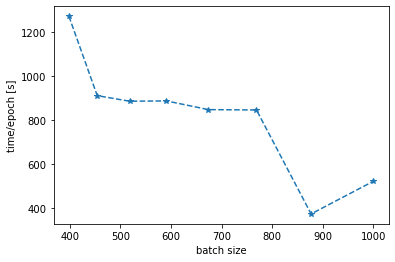

In [236]:
dt_cpu= [wall_time[idx].item() for idx in batch_switch_idx]
dt_cpu = np.diff(dt_cpu)
plt.plot(batch_sizes,dt_cpu,'*--')
plt.xlabel("batch size")
plt.ylabel("time/epoch [s]")

Sadly this does not scale as expected. If I look at the first figure, I see that the code needs sufficiently viewer steps. But the 2. Figure shows that this doesnt translate in performance speed up ):

0        0.000000
1      207.880517
2      434.797477
3      452.729208
4      681.201822
5      776.260401
6      876.035504
7      971.680601
8      978.312083
9     1093.199712
10    1270.221430
11    1377.271353
12    1441.147829
13    1565.884269
14    1603.130711
15    1712.970219
16    1831.586559
17    1867.293910
18    1996.721282
19    2180.194088
20    2298.439354
21    2333.087700
22    2455.509398
23    2538.887568
24    2657.869461
25    2735.858640
26    2858.302567
27    3065.002427
28    3198.475863
29    3202.513610
30    3328.634859
31    3465.142778
32    3608.084796
33    3619.971267
34    3741.829097
35    3951.044011
36    4072.261375
37    4176.785248
38    4215.658433
39    4369.601599
40    4458.106840
41    4563.970043
42    4797.651593
43    4893.550553
44    4999.812041
45    5081.543498
46    5252.367363
47    5275.341886
48    5380.719407
49    5642.684452
50    5713.017994
51    6016.145195
52    6056.512934
53    6161.096300
54    6343.542224
55    6434